## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.317813 -0.113067 -0.426732 -1.279418  1.102953 -0.145372
1 -1.008947 -0.850922  1.371151  0.774464  1.465444  0.301542
2 -0.444180 -0.690205  0.601695  1.533957  0.821572  0.472429
3  0.733652 -1.741564 -1.234001 -0.687350  0.473190 -0.818593
4 -0.772712 -0.332138 -0.012589 -1.430463 -0.577430 -1.716001


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9533051	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9454821	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9360616	total: 70.6ms	remaining: 23.5s
3:	learn: 0.9269501	total: 71ms	remaining: 17.7s
4:	learn: 0.9201050	total: 71.5ms	remaining: 14.2s
5:	learn: 0.9099744	total: 72ms	remaining: 11.9s
6:	learn: 0.9002524	total: 72.5ms	remaining: 10.3s
7:	learn: 0.8917619	total: 73ms	remaining: 9.06s
8:	learn: 0.8840809	total: 73.5ms	remaining: 8.1s
9:	learn: 0.8768668	total: 74.1ms	remaining: 7.33s
10:	learn: 0.8699995	total: 74.6ms	remaining: 6.71s
11:	learn: 0.8614766	total: 75.1ms	remaining: 6.18s
12:	learn: 0.8524732	total: 75.6ms	remaining: 5.74s
13:	learn: 0.8431728	total: 76ms	remaining: 5.35s
14:	learn: 0.8356463	total: 76.4ms	remaining: 5.01s
15:	learn: 0.8272910	total: 76.8ms	remaining: 4.72s
16:	learn: 0.8209595	total: 77.2ms	remaining: 4.46s
17:	learn: 0.8132226	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8048837	total: 78.2ms	remaining: 4.04s
1

80:	learn: 0.4793617	total: 107ms	remaining: 1.22s
81:	learn: 0.4756144	total: 108ms	remaining: 1.21s
82:	learn: 0.4716622	total: 109ms	remaining: 1.2s
83:	learn: 0.4685865	total: 109ms	remaining: 1.19s
84:	learn: 0.4645297	total: 109ms	remaining: 1.18s
85:	learn: 0.4612602	total: 110ms	remaining: 1.17s
86:	learn: 0.4575699	total: 110ms	remaining: 1.16s
87:	learn: 0.4536095	total: 111ms	remaining: 1.15s
88:	learn: 0.4498087	total: 111ms	remaining: 1.14s
89:	learn: 0.4471127	total: 112ms	remaining: 1.13s
90:	learn: 0.4440217	total: 112ms	remaining: 1.12s
91:	learn: 0.4402344	total: 112ms	remaining: 1.11s
92:	learn: 0.4366881	total: 113ms	remaining: 1.1s
93:	learn: 0.4331998	total: 113ms	remaining: 1.09s
94:	learn: 0.4298347	total: 114ms	remaining: 1.08s
95:	learn: 0.4269262	total: 114ms	remaining: 1.08s
96:	learn: 0.4240964	total: 115ms	remaining: 1.07s
97:	learn: 0.4211568	total: 115ms	remaining: 1.06s
98:	learn: 0.4179974	total: 116ms	remaining: 1.05s
99:	learn: 0.4142065	total: 116ms

247:	learn: 0.1505069	total: 188ms	remaining: 569ms
248:	learn: 0.1496347	total: 188ms	remaining: 568ms
249:	learn: 0.1486405	total: 189ms	remaining: 566ms
250:	learn: 0.1479480	total: 189ms	remaining: 564ms
251:	learn: 0.1470032	total: 190ms	remaining: 563ms
252:	learn: 0.1461079	total: 190ms	remaining: 561ms
253:	learn: 0.1450115	total: 190ms	remaining: 559ms
254:	learn: 0.1439939	total: 191ms	remaining: 558ms
255:	learn: 0.1430902	total: 191ms	remaining: 556ms
256:	learn: 0.1420821	total: 192ms	remaining: 555ms
257:	learn: 0.1411557	total: 192ms	remaining: 553ms
258:	learn: 0.1402615	total: 193ms	remaining: 552ms
259:	learn: 0.1393316	total: 193ms	remaining: 550ms
260:	learn: 0.1384009	total: 194ms	remaining: 549ms
261:	learn: 0.1373210	total: 194ms	remaining: 547ms
262:	learn: 0.1364486	total: 195ms	remaining: 546ms
263:	learn: 0.1356633	total: 195ms	remaining: 544ms
264:	learn: 0.1347778	total: 196ms	remaining: 543ms
265:	learn: 0.1339504	total: 196ms	remaining: 541ms
266:	learn: 

470:	learn: 0.0404523	total: 290ms	remaining: 326ms
471:	learn: 0.0402358	total: 291ms	remaining: 325ms
472:	learn: 0.0400024	total: 291ms	remaining: 324ms
473:	learn: 0.0397478	total: 291ms	remaining: 323ms
474:	learn: 0.0395655	total: 292ms	remaining: 323ms
475:	learn: 0.0394102	total: 292ms	remaining: 322ms
476:	learn: 0.0391796	total: 293ms	remaining: 321ms
477:	learn: 0.0389786	total: 293ms	remaining: 320ms
478:	learn: 0.0387338	total: 294ms	remaining: 320ms
479:	learn: 0.0385306	total: 294ms	remaining: 319ms
480:	learn: 0.0383815	total: 295ms	remaining: 318ms
481:	learn: 0.0381672	total: 295ms	remaining: 317ms
482:	learn: 0.0380434	total: 296ms	remaining: 316ms
483:	learn: 0.0378075	total: 296ms	remaining: 315ms
484:	learn: 0.0375999	total: 297ms	remaining: 315ms
485:	learn: 0.0374788	total: 297ms	remaining: 314ms
486:	learn: 0.0372702	total: 297ms	remaining: 313ms
487:	learn: 0.0370830	total: 298ms	remaining: 313ms
488:	learn: 0.0369651	total: 299ms	remaining: 312ms
489:	learn: 

635:	learn: 0.0205027	total: 370ms	remaining: 212ms
636:	learn: 0.0204230	total: 371ms	remaining: 211ms
637:	learn: 0.0203316	total: 371ms	remaining: 211ms
638:	learn: 0.0202608	total: 372ms	remaining: 210ms
639:	learn: 0.0201913	total: 372ms	remaining: 209ms
640:	learn: 0.0200509	total: 373ms	remaining: 209ms
641:	learn: 0.0199641	total: 373ms	remaining: 208ms
642:	learn: 0.0198859	total: 373ms	remaining: 207ms
643:	learn: 0.0197915	total: 374ms	remaining: 207ms
644:	learn: 0.0197676	total: 375ms	remaining: 206ms
645:	learn: 0.0196752	total: 375ms	remaining: 206ms
646:	learn: 0.0196359	total: 375ms	remaining: 205ms
647:	learn: 0.0195454	total: 376ms	remaining: 204ms
648:	learn: 0.0195221	total: 376ms	remaining: 204ms
649:	learn: 0.0194425	total: 377ms	remaining: 203ms
650:	learn: 0.0193096	total: 377ms	remaining: 202ms
651:	learn: 0.0192833	total: 378ms	remaining: 202ms
652:	learn: 0.0192086	total: 378ms	remaining: 201ms
653:	learn: 0.0191826	total: 379ms	remaining: 200ms
654:	learn: 

863:	learn: 0.0101180	total: 473ms	remaining: 74.4ms
864:	learn: 0.0101051	total: 473ms	remaining: 73.9ms
865:	learn: 0.0100555	total: 474ms	remaining: 73.3ms
866:	learn: 0.0100068	total: 474ms	remaining: 72.7ms
867:	learn: 0.0099527	total: 474ms	remaining: 72.2ms
868:	learn: 0.0099050	total: 475ms	remaining: 71.6ms
869:	learn: 0.0098524	total: 475ms	remaining: 71ms
870:	learn: 0.0098056	total: 476ms	remaining: 70.5ms
871:	learn: 0.0097673	total: 476ms	remaining: 69.9ms
872:	learn: 0.0097216	total: 477ms	remaining: 69.4ms
873:	learn: 0.0096767	total: 477ms	remaining: 68.8ms
874:	learn: 0.0096259	total: 478ms	remaining: 68.3ms
875:	learn: 0.0095819	total: 478ms	remaining: 67.7ms
876:	learn: 0.0095325	total: 479ms	remaining: 67.1ms
877:	learn: 0.0095038	total: 479ms	remaining: 66.6ms
878:	learn: 0.0094608	total: 480ms	remaining: 66ms
879:	learn: 0.0094329	total: 480ms	remaining: 65.5ms
880:	learn: 0.0093909	total: 480ms	remaining: 64.9ms
881:	learn: 0.0093584	total: 481ms	remaining: 64.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

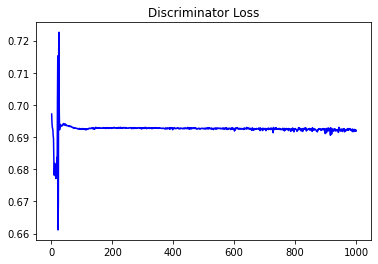

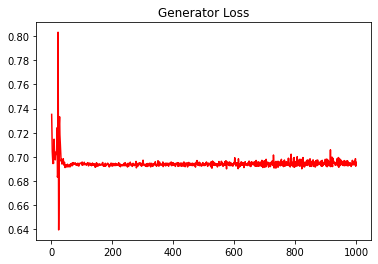

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05540726077815806


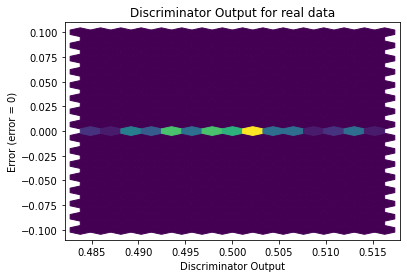

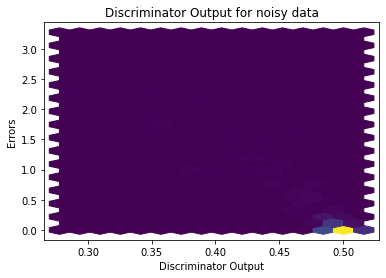

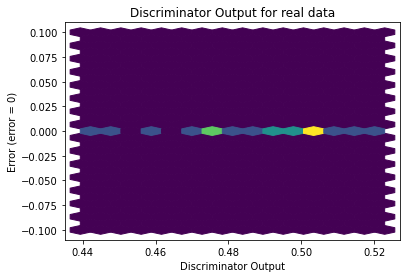

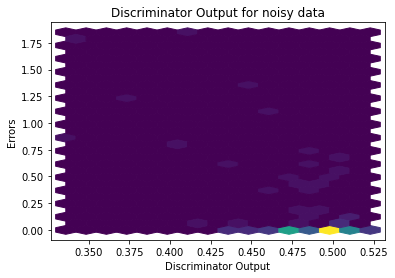

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


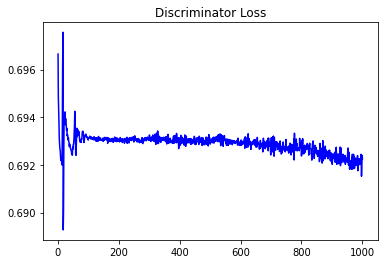

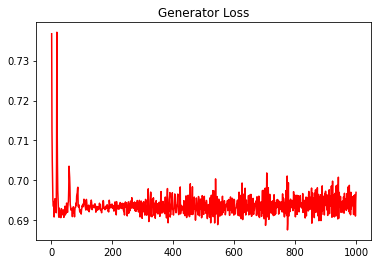

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07552468343334774


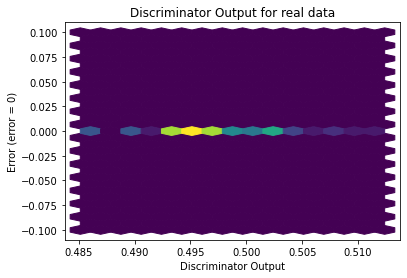

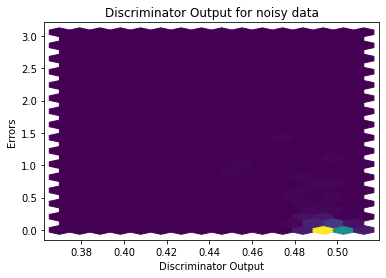

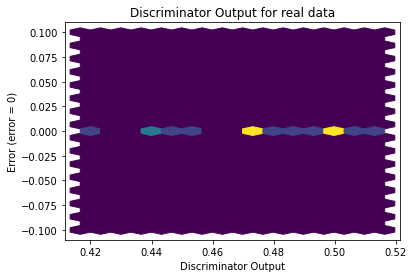

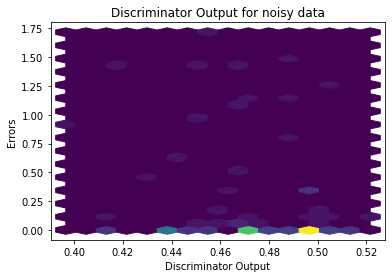

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0719]], requires_grad=True)
